In [10]:
# nli_analysis.ipynb

import json
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

path = "nli_verification_results_subset.json"
# path = "nli_verification_results.json"

# 1) Load the results JSON
with open(path, "r", encoding="utf-8") as f:
    data = json.load(f)

# data should have:
# {
#   "results": [...],   # each entry: {doc_id, claim_id, claim_text, pred_label, gold_label, ...}
#   "metrics": {...}    # overall metrics (accuracy, macro_precision, etc.)
# }
results = data["results"]
metrics = data["metrics"]

# 2) Convert results to a DataFrame
df = pd.DataFrame(results)
df.head()

,doc_id,claim_id,claim_text,pred_label,gold_label,max_entailment_score,max_contradiction_score,max_neutral_score
0,13734012,2,1 in 5 million in UK have abnormal PrP positiv...,neutral,contradiction,0.124916,0.106146,0.991362
1,13734012,5,1/2000 in UK have abnormal PrP positivity.,neutral,entailment,0.049001,0.505820,0.966415
2,13734012,48,"A total of 1,000 people in the UK are asymptom...",neutral,contradiction,0.013483,0.726517,0.968404
3,22080671,15,50% of patients exposed to radiation have acti...,neutral,neutral,0.016096,0.188837,0.992260
4,22080671,139,At least 85% of patients exposed to radiation ...,neutral,neutral,0.078055,0.286771,0.932288


In [11]:
print("=== Overall Metrics ===")
for metric_name, metric_value in metrics.items():
    print(f"{metric_name}: {metric_value:.3f}")


=== Overall Metrics ===
accuracy: 0.493
macro_precision: 0.655
macro_recall: 0.512
macro_f1: 0.458


In [12]:
gold_counts = Counter(df["gold_label"])
print("Gold label distribution:", gold_counts)

Gold label distribution: Counter({'entailment': 129, 'neutral': 117, 'contradiction': 89})


In [13]:
pred_counts = Counter(df["pred_label"])
print("Predicted label distribution:", pred_counts)


Predicted label distribution: Counter({'neutral': 219, 'contradiction': 97, 'entailment': 19})


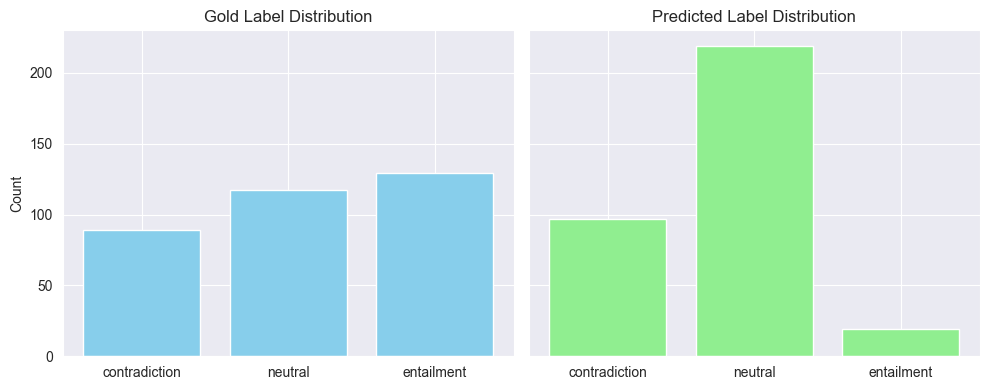

In [14]:
labels = ["contradiction", "neutral", "entailment"]

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

axes[0].bar(labels, [gold_counts[l] for l in labels], color="skyblue")
axes[0].set_title("Gold Label Distribution")
axes[0].set_ylabel("Count")

axes[1].bar(labels, [pred_counts[l] for l in labels], color="lightgreen")
axes[1].set_title("Predicted Label Distribution")

plt.tight_layout()
plt.show()


In [15]:
label_map = {"contradiction": 0, "neutral": 1, "entailment": 2}
df["gold_id"] = df["gold_label"].map(label_map)
df["pred_id"] = df["pred_label"].map(label_map)

confusion = pd.crosstab(df["gold_id"], df["pred_id"], rownames=["Gold"], colnames=["Pred"])
confusion


Pred,0,1,2
Gold,,,
0,52,37,0
1,23,94,0
2,22,88,19


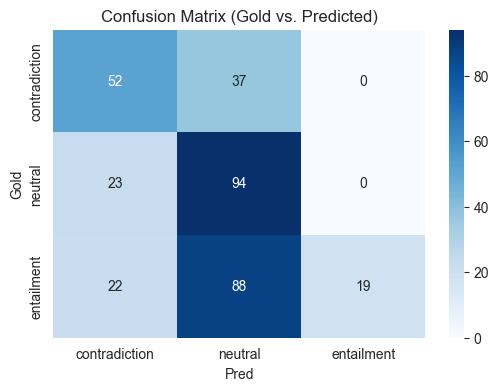

In [16]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d",
            xticklabels=label_map.keys(),
            yticklabels=label_map.keys())
plt.title("Confusion Matrix (Gold vs. Predicted)")
plt.show()

In [17]:
df[["gold_label", "max_entailment_score", "max_contradiction_score", "max_neutral_score"]].describe()

,max_entailment_score,max_contradiction_score,max_neutral_score
count,335.000000,335.000000,335.000000
mean,0.304958,0.634588,0.889214
std,0.313285,0.320834,0.157623
min,0.002496,0.017238,0.152088
25%,0.060882,0.338559,0.867192
50%,0.159024,0.711693,0.951969
75%,0.461671,0.945490,0.985496
max,0.993119,0.999255,0.997831


<Figure size 1200x400 with 0 Axes>

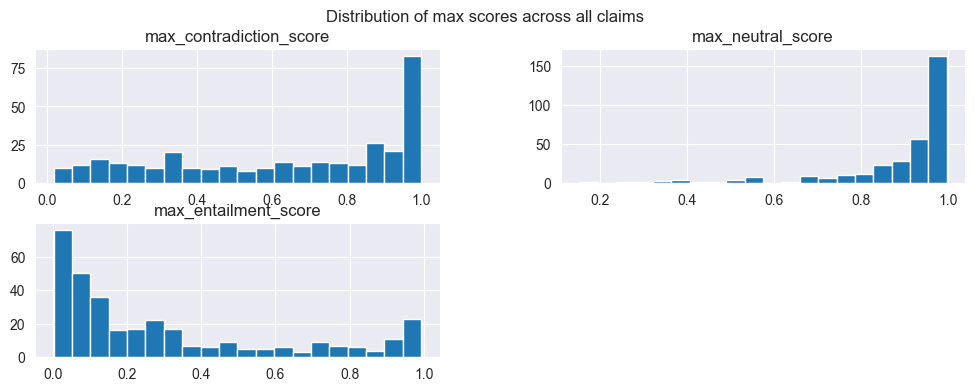

In [18]:
plt.figure(figsize=(12, 4))
scores_cols = ["max_contradiction_score","max_neutral_score","max_entailment_score"]
df[scores_cols].hist(bins=20, figsize=(12, 4))
plt.suptitle("Distribution of max scores across all claims")
plt.show()
